# Landau free energy with a cubic term

If we allow for a cubic term in the Landau free energy, we get a first-order phase transition. Linear powers in the order parameter are due to couplings to an external field; for simplicity, we'll consider the case where that field is set such that the linear term vanishes. Therefore, our free energy per unit volume reads:
$$ F(\phi) = \frac{a}{2} \phi^2 - \frac{b}{3} \phi^3 + \frac{c}{4} \phi^4 $$
Note that $F$ represents the total free energy and $\phi$ an arbitrary order parameter. We require $c > 0$ for the system to be globally stable. The sign of $b$ will not change the global stability, just the sign of the order parameter in the second phase; we set $b>0$. We can rescale both $F$ and $\phi$ such that we get $b=c=1$.

In [70]:
# Python libraries
%reset -f
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=12)
#plt.rc('font', family='arial') # Not working?
plt.rc('axes', titlesize=16)
from scipy.optimize import fsolve

In [2]:
# The free energy
def F(x, a): return (a/2) * x * x - (1/3) * x * x * x + (1/4) * x * x * x * x

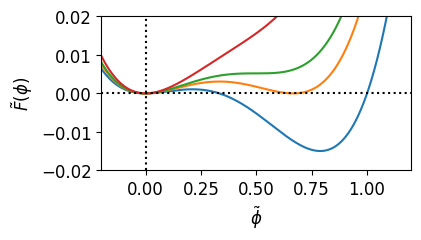

In [15]:
# Plot the free energy, for a range of values of a.
x = np.linspace(-0.20,1.15,1350)
plt.figure(figsize=(4,2))
#plt.figure(figsize=(18,6)) # NB: Size in inches.
#plt.subplot(1,3,1)
plt.plot(x, F(x, 1/6), x, F(x, 2/9), x, F(x, 1/4), x, F(x, 1/3))
#plt.title('Hare / lynx population dynamics')
plt.xlim(-0.2,1.2)
plt.ylim(-0.02,0.02)
plt.xlabel('$\\tilde{\phi}$')
plt.ylabel('$\\tilde{F}(\phi)$')
plt.axhline(y = 0, color = 'k', linestyle = ':')
plt.axvline(x = 0, color = 'k', linestyle = ':')
#plt.legend(['$\chi_1 = \chi_2 = 2$', '$\chi_1 = 1, \chi_2 = 2$', '$\chi_1 = 2, \chi_2 = 1$'])
plt.savefig("Landaufirstordertransitionsgraph.pdf", format="pdf", bbox_inches="tight")

## Plot of the positions where $F'(\phi) = 0$.
These are solutions of $\phi(a-\phi+\phi^2) = 0$, i.e., either $\phi = 0$ or $\phi = \frac12 \pm \frac12 \sqrt{1-4a}$. We'll only take the positive solution as the negative here does not correspond to a minimum but to the local maximum.

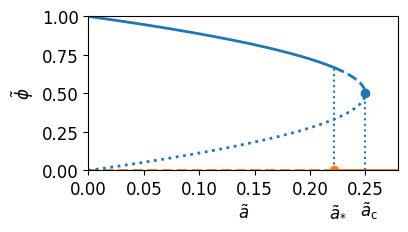

In [55]:
def phiroot(a): return 0.5 + 0.5 * np.sqrt(1-4*a)
def phiroot2(a): return 0.5 - 0.5 * np.sqrt(1-4*a)

# Figure, size in inches.
plt.figure(figsize=(4,2))

# Plot the part where the non-zero root is the global minimum.
a = np.linspace(0,2/9,8*36)
plt.plot(a, phiroot(a), linewidth=2)
#plt.plot(a, np.zeros(8*36), linestyle="dashed", linewidth=2)
plt.plot([0,2/9], [0,0], linestyle="dashed", linewidth=2)

# Plot the part where the zero root is the global minimum.
a = np.linspace(2/9, 1/4, 36)
plt.plot(a, phiroot(a), color="#1f77b4", linestyle="dashed", linewidth=2)
plt.plot((2/9,0.28), np.zeros(2), color="#ff7f0e", linestyle="-", linewidth=2)

# Plot the unstable branch (global maximum).
a = np.linspace(0, 0.25, 9*36)
plt.plot(a, phiroot2(a), linewidth=2, color="#1f77b4", linestyle="dotted")

# Lines from critical points to graph.
plt.plot((2/9,2/9), (0, phiroot(2/9)), color="#1f77b4", linestyle="dotted")
plt.plot((0.25,0.25),(0, 0.5), color="#1f77b4", linestyle="dotted")

# Critical points.
plt.plot(0.25, 0.5, color="#1f77b4", marker='o')
plt.plot(2/9, 0, color="#ff7f0e", marker='o')

# Graph makeup.
plt.xlim(0,0.28)
plt.ylim(0,1)
plt.xlabel('$\\tilde{a}$')
plt.ylabel('$\\tilde{\phi}$')
#plt.axvline(x = 0.25, color = 'k', linestyle = ':')

# Labels
plt.text(2/9-0.005, -0.3, "$\\tilde{a}_\mathrm{*}$", fontsize=12)
plt.text(0.25-0.005, -0.3, "$\\tilde{a}_\mathrm{c}$", fontsize=12)

# Export graph.
plt.savefig("Landaufirstorderphasediagram.pdf", format="pdf", bbox_inches="tight")

## Plot of the correlation length.
The correlation length~$\xi$ is defined through $$ \frac{\tilde{K}}{\tilde{\xi}^2} = \left. \frac{\partial^2 \tilde{F}}{\partial\tilde{\phi}^2} \right|_{\tilde{\phi} = \tilde{\phi}_\mathrm{eq}}, $$
where $\tilde{K}$ is a (rescaled) material parameter. Solving for $\tilde{\xi}$, we get
$$ \tilde{\xi} = \left\lbrace \begin{array}{ll} \sqrt{\frac{2\tilde{K}}{1-4\tilde{a}+\sqrt{1-4\tilde{a}}}} & \text{for } \tilde{a} < \tilde{a}_\mathrm{c}, \\
\sqrt{\tilde{K} / \tilde{a}} & \text{for } \tilde{a} > \tilde{a}_\mathrm{c}. \end{array} \right. $$

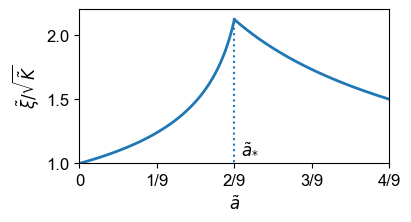

In [87]:
def correlationlength(a): return np.sqrt(2/(1-4*a+np.sqrt(1-4*a)))

# Figure, size in inches.
plt.figure(figsize=(4,2))
ax = plt.axes()

# Plot the part where the non-zero root is the global minimum.
a = np.linspace(0,2/9,8*36)
plt.plot(a, correlationlength(a), linewidth=2)
a = np.linspace(2/9, 4/9, 8*36)
plt.plot(a, np.sqrt(1/a), color="#1f77b4", linewidth=2)

# Vertical line
plt.plot([2/9, 2/9], [0, np.sqrt(9/2)], color="#1f77b4", linestyle="dotted")

# Graph makeup.
plt.xlim(0,4/9)
plt.ylim(1,2.2)
#plt.xticks([0, 1/9, 2/9, 3/9, 4/9])
plt.xlabel('$\\tilde{a}$')
plt.ylabel('$\\tilde{\\xi} / \sqrt{\\tilde{K}}$')

ax.set_xticks([0, 1/9, 2/9, 3/9, 4/9])
ax.set_xticklabels(["0", "1/9", "2/9", "3/9", "4/9"])

plt.text(2/9+0.01, 1.075, "$\\tilde{a}_\mathrm{*}$", fontsize=12)

plt.savefig("Landaufirstordertransitioncorrelationlength.pdf", format="pdf", bbox_inches="tight")